<a href="https://colab.research.google.com/github/ZafarBukhari/AI-ISB-Q2/blob/master/Deep_Learning/IMDB_Dataset_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internet Movie Database (IMDB) Dataset - A Binary Classification Model

In [2]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import models, layers, optimizers
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
(train_data, train_labels), (test_data, test_labels)= imdb.load_data(num_words=10000)

In [5]:
print('word: ', train_data[0])
print('label: ', train_labels[0])

word:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
label:  1


In [23]:
word_index =imdb.get_word_index()

In [7]:
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_review=' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing Dataset

In [8]:
def vectorize_sequences(sequences, dimention=10000):
  results = np.zeros((len(sequences), dimention))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [10]:
x_train.shape

(25000, 10000)

In [11]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Building Model

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
x_val.shape

(10000, 10000)

In [16]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5215 - accuracy: 0.7814 - val_loss: 0.3933 - val_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3136 - accuracy: 0.9004 - val_loss: 0.3288 - val_accuracy: 0.8711
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2258 - accuracy: 0.9283 - val_loss: 0.2908 - val_accuracy: 0.8843
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1777 - accuracy: 0.9438 - val_loss: 0.2882 - val_accuracy: 0.8845
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1453 - accuracy: 0.9541 - val_loss: 0.2821 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1208 - accuracy: 0.9631 - val_loss: 0.2940 - val_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.0963 - accuracy: 0.9725 - val_loss: 0.3261 - val_accuracy: 0.8752
Epoch 8/20
30

In [17]:
history_dict = history.history
print(history_dict)

{'loss': [0.521544873714447, 0.3136081397533417, 0.22579236328601837, 0.1777137666940689, 0.145299032330513, 0.12083406746387482, 0.09628895670175552, 0.07997670024633408, 0.07032507658004761, 0.056237366050481796, 0.044728152453899384, 0.035879991948604584, 0.028422819450497627, 0.02107885107398033, 0.019098486751317978, 0.014628794975578785, 0.0112520856782794, 0.0063154730014503, 0.011257548816502094, 0.0033840814139693975], 'accuracy': [0.7814000248908997, 0.9003999829292297, 0.9282666444778442, 0.9437999725341797, 0.9540666937828064, 0.9631333351135254, 0.9724666476249695, 0.978600025177002, 0.9811999797821045, 0.9852666854858398, 0.9901333451271057, 0.9929999709129333, 0.995199978351593, 0.9965999722480774, 0.9962000250816345, 0.9974666833877563, 0.9983999729156494, 0.9997333288192749, 0.9974666833877563, 0.9998666644096375], 'val_loss': [0.3933010995388031, 0.3288351893424988, 0.2907690405845642, 0.28821861743927, 0.28210851550102234, 0.29398223757743835, 0.326121062040329, 0.34

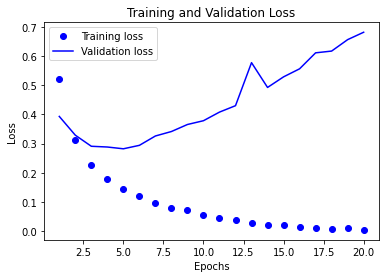

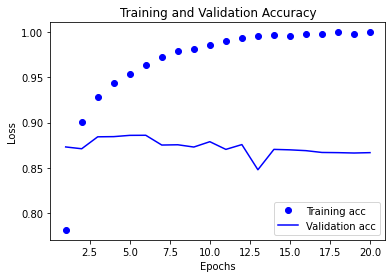

In [19]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predition on the Basis of Trained Model

In [21]:
model.predict(x_test)

array([[0.01020136],
       [1.        ],
       [0.9803883 ],
       ...,
       [0.00387338],
       [0.024941  ],
       [0.67864794]], dtype=float32)